In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mpdates
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.models import Model, load_model
from keras.layers import Input, Dense


In [130]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [101]:
dataset=pd.read_csv('dataset_SCL.csv', parse_dates=['Fecha-I', 'Fecha-O'])

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_23096\202927716.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv('dataset_SCL.csv', parse_dates=['Fecha-I', 'Fecha-O'])


In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68206 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

In [14]:
dataset.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [18]:
dataset['Fecha-O']-dataset['Fecha-I']

0         0 days 00:03:00
1         0 days 00:09:00
2         0 days 00:09:00
3         0 days 00:03:00
4       -1 days +23:58:00
               ...       
68201     0 days 00:46:00
68202     0 days 00:16:00
68203     0 days 00:40:00
68204     0 days 00:13:00
68205     0 days 00:09:00
Length: 68206, dtype: timedelta64[ns]

In [21]:
(dataset['Fecha-O']-dataset['Fecha-I']).map(mpdates.date2num)

0         2.083333
1         6.250000
2         6.250000
3         2.083333
4        -1.388889
           ...    
68201    31.944444
68202    11.111111
68203    27.777778
68204     9.027778
68205     6.250000
Length: 68206, dtype: float64

In [22]:
(dataset['Fecha-O']-dataset['Fecha-I']).map(mpdates.date2num) > 10.415

0        False
1        False
2        False
3        False
4        False
         ...  
68201     True
68202     True
68203     True
68204    False
68205    False
Length: 68206, dtype: bool

In [23]:
dataset[(dataset['Fecha-O']-dataset['Fecha-I']).map(mpdates.date2num) > 10.415]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,10,1,2017,Martes,I,American Airlines,Santiago,Miami
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,12,1,2017,Jueves,I,American Airlines,Santiago,Miami
18,2017-01-01 22:00:00,912,SCEL,KMIA,AAL,2017-01-01 22:15:00,912,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
23,2017-01-06 22:00:00,912,SCEL,KMIA,AAL,2017-01-06 22:52:00,912,SCEL,KMIA,AAL,6,1,2017,Viernes,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68198,2017-12-22 18:30:00,307,SCEL,SCCI,JAT,2017-12-22 18:47:00,307.0,SCEL,SCCI,JAT,22,12,2017,Viernes,N,JetSmart SPA,Santiago,Punta Arenas
68200,2017-12-20 14:55:00,400,SCEL,SPJC,JAT,2017-12-20 15:11:00,400.0,SCEL,SPJC,JAT,20,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima


In [141]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

In [29]:
dataset['Vlo-I']

0        226
1        226
2        226
3        226
4        226
        ... 
68201    400
68202    400
68203    400
68204    400
68205    400
Name: Vlo-I, Length: 68206, dtype: object

In [30]:
dataset['Vlo-O']

0          226
1          226
2          226
3          226
4          226
         ...  
68201    400.0
68202    400.0
68203    400.0
68204    400.0
68205    400.0
Name: Vlo-O, Length: 68206, dtype: object

In [147]:
dataset.fillna(0, inplace=True)

In [148]:
dataset[dataset['Vlo-O'] == 0]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,0,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


In [41]:
dataset['Vlo-O'] != dataset['Vlo-I']

0        False
1        False
2        False
3        False
4        False
         ...  
68201    False
68202    False
68203    False
68204    False
68205    False
Length: 68206, dtype: bool

In [42]:
dataset[dataset['Vlo-O'] != dataset['Vlo-I']]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6018,2017-01-05 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-05 09:36:00,1001,SCEL,SAEZ,LAN,5,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
6020,2017-01-07 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-07 06:59:00,1001,SCEL,SAEZ,LAN,7,1,2017,Sabado,I,Grupo LATAM,Santiago,Buenos Aires
6022,2017-01-12 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-12 08:05:00,1003,SCEL,SAEZ,LAN,12,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
6023,2017-01-13 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-13 07:06:00,1001,SCEL,SAEZ,LAN,13,1,2017,Viernes,I,Grupo LATAM,Santiago,Buenos Aires
6025,2017-01-19 10:50:00,4501,SCEL,SAEZ,LAN,2017-01-19 10:56:00,1001,SCEL,SAEZ,LAN,19,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65532,2017-12-16 13:41:00,265,SCEL,SCTE,LAN,2017-12-16 13:49:00,265.0,SCEL,SCTE,LXP,16,12,2017,Sabado,N,Grupo LATAM,Santiago,Puerto Montt
65533,2017-12-18 15:59:00,265,SCEL,SCTE,LAN,2017-12-18 16:07:00,265.0,SCEL,SCTE,LXP,18,12,2017,Lunes,N,Grupo LATAM,Santiago,Puerto Montt
65534,2017-12-19 15:11:00,265,SCEL,SCTE,LAN,2017-12-19 15:10:00,265.0,SCEL,SCTE,LXP,19,12,2017,Martes,N,Grupo LATAM,Santiago,Puerto Montt
65535,2017-12-25 16:19:00,265,SCEL,SCTE,LAN,2017-12-25 16:24:00,265.0,SCEL,SCTE,LXP,25,12,2017,Lunes,N,Grupo LATAM,Santiago,Puerto Montt


In [139]:
dataset[dataset['Vlo-O'] != dataset['Vlo-I']].OPERA.value_counts()

Grupo LATAM                 74
Latin American Wings        18
Sky Airline                  5
United Airlines              4
American Airlines            2
Air Canada                   2
Air France                   2
Austral                      2
Delta Air                    2
Avianca                      2
Plus Ultra Lineas Aereas     2
Copa Air                     1
Lacsa                        1
Aeromexico                   1
Aerolineas Argentinas        1
JetSmart SPA                 1
Name: OPERA, dtype: int64

In [134]:
dataset[dataset['Vlo-O'] != dataset['Vlo-I']].OPERA.value_counts().index

Index(['Grupo LATAM', 'Latin American Wings', 'Sky Airline', 'United Airlines',
       'American Airlines', 'Air Canada', 'Air France', 'Austral', 'Delta Air',
       'Avianca', 'Plus Ultra Lineas Aereas', 'Copa Air', 'Lacsa',
       'Aeromexico', 'Aerolineas Argentinas', 'JetSmart SPA'],
      dtype='object')

c:\Users\Gerardo\anaconda3\envs\LATAM\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


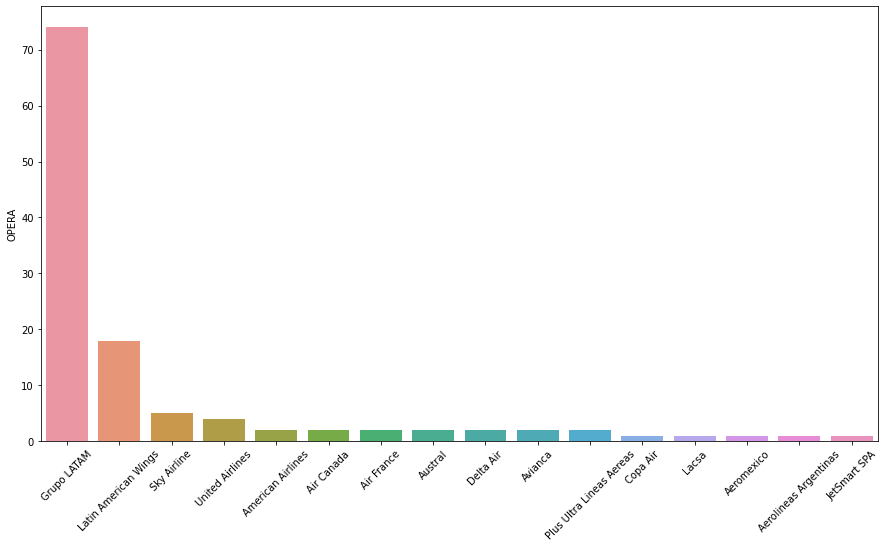

In [138]:
plt.figure(figsize = (15,8))
ax = sns.barplot(dataset[dataset['Vlo-O'] != dataset['Vlo-I']].OPERA.value_counts().index, dataset[dataset['Vlo-O'] != dataset['Vlo-I']].OPERA.value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.show()

In [48]:
dataset[dataset['Vlo-O'] != dataset['Vlo-I']].OPERA=='Latin American Wings'

6018     False
6020     False
6022     False
6023     False
6025     False
         ...  
65532    False
65533    False
65534    False
65535    False
68068    False
Name: OPERA, Length: 1850, dtype: bool

In [49]:
dataset[dataset['Vlo-O'] != dataset['Vlo-I']][dataset[dataset['Vlo-O'] != dataset['Vlo-I']].OPERA=='Latin American Wings']

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,0,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima
6086,2017-01-18 01:15:00,700,SCEL,SPJC,LAW,2017-01-18 01:36:00,702,SCEL,SPJC,56R,18,1,2017,Miercoles,I,Latin American Wings,Santiago,Lima
6095,2017-01-05 01:15:00,704,SCEL,SPJC,LAW,2017-01-05 01:15:00,708,SCEL,SPJC,56R,5,1,2017,Jueves,I,Latin American Wings,Santiago,Lima
6098,2017-01-12 01:15:00,704,SCEL,SPJC,LAW,2017-01-12 01:55:00,702,SCEL,SPJC,56R,12,1,2017,Jueves,I,Latin American Wings,Santiago,Lima
6107,2017-01-03 01:15:00,1704,SCEL,SPJC,LAW,2017-01-03 02:38:00,1700,SCEL,SPJC,56R,3,1,2017,Martes,I,Latin American Wings,Santiago,Lima
11644,2017-02-03 01:15:00,702,SCEL,SPJC,LAW,2017-02-03 01:17:00,700,SCEL,SPJC,JMR,3,2,2017,Viernes,I,Latin American Wings,Santiago,Lima
11645,2017-02-17 01:15:00,702,SCEL,SPJC,LAW,2017-02-17 02:20:00,700,SCEL,SPJC,JMR,17,2,2017,Viernes,I,Latin American Wings,Santiago,Lima
11647,2017-02-01 01:15:00,704,SCEL,SPJC,LAW,2017-02-01 02:31:00,702,SCEL,SPJC,JMR,1,2,2017,Miercoles,I,Latin American Wings,Santiago,Lima
17087,2017-03-26 14:00:00,204,SCEL,SPJC,LAW,2017-03-26 15:18:00,202,SCEL,SPJC,JMR,26,3,2017,Domingo,I,Latin American Wings,Santiago,Lima
17092,2017-03-19 01:15:00,700,SCEL,SPJC,LAW,2017-03-19 01:21:00,704,SCEL,SPJC,JMR,19,3,2017,Domingo,I,Latin American Wings,Santiago,Lima


In [44]:
dataset[dataset['Vlo-O'] == dataset['Vlo-I']]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


In [56]:
dataset['Vlo-O'].value_counts()==400.0

174     False
11      False
116     False
150     False
704     False
        ...  
9956    False
2726    False
9860    False
9858    False
1297    False
Name: Vlo-O, Length: 867, dtype: bool

In [59]:
list=dataset['Vlo-O'].unique()

In [65]:
list[0]

'226'

In [63]:
type(list)

numpy.ndarray

In [75]:
dec=[]
for elem in list:
    if str(elem).find('.') > 0:
        dec.append(elem)

In [78]:
dataset['Vlo-O'][dataset['Vlo-O']==400.0]=400.0

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_23096\3618596498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Vlo-O'][dataset['Vlo-O']==400.0]=400.0


In [79]:
dataset['Vlo-O'][dataset['Vlo-O']==400.0]

68200    400.0
68201    400.0
68202    400.0
68203    400.0
68204    400.0
68205    400.0
Name: Vlo-O, dtype: object

In [80]:
dec[0]

'150.0'

In [82]:
float(dec[0])

150.0

In [83]:
int(float(dec[0]))

150

In [96]:
dataset['Vlo-O'][0]

'226'

In [113]:
type(dataset['Vlo-O'][1933])

str

In [90]:
dataset['Vlo-I']=str(dataset['Vlo-I'])

In [109]:
dataset['Vlo-O'][dataset['Vlo-O']==dec[0]]

63806    150.0
63807    150.0
63808    150.0
63809    150.0
63810    150.0
63811    150.0
63812    150.0
63813    150.0
63814    150.0
63815    150.0
63816    150.0
63817    150.0
63818    150.0
63819    150.0
63820    150.0
63821    150.0
63822    150.0
64839    150.0
64840    150.0
64841    150.0
64842    150.0
64843    150.0
64844    150.0
64845    150.0
64846    150.0
64847    150.0
64848    150.0
64849    150.0
64850    150.0
64851    150.0
64852    150.0
64853    150.0
64854    150.0
64855    150.0
64856    150.0
64857    150.0
64858    150.0
64859    150.0
64860    150.0
64861    150.0
Name: Vlo-O, dtype: object

In [114]:
dataset['Vlo-O'][dataset['Vlo-O']==dec[0]]=str(int(float(dec[0])))

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_23096\2365872768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Vlo-O'][dataset['Vlo-O']==dec[0]]=str(int(float(dec[0])))


In [110]:
dataset['Vlo-I'][dataset['Vlo-I']==str(150)]

1933     150
1934     150
1935     150
1936     150
1937     150
        ... 
64857    150
64858    150
64859    150
64860    150
64861    150
Name: Vlo-I, Length: 557, dtype: object

In [115]:
dataset['Vlo-O'][dataset['Vlo-O']==str(150)]

1933     150
1934     150
1935     150
1936     150
1937     150
        ... 
64857    150
64858    150
64859    150
64860    150
64861    150
Name: Vlo-O, Length: 557, dtype: object

In [116]:
dataset['Vlo-I'][dataset['Vlo-I']==str(150)] == dataset['Vlo-O'][dataset['Vlo-O']==str(150)]

1933     True
1934     True
1935     True
1936     True
1937     True
         ... 
64857    True
64858    True
64859    True
64860    True
64861    True
Length: 557, dtype: bool

In [117]:
for elem in dec:
    dataset['Vlo-O'][dataset['Vlo-O']==elem]=str(int(float(elem)))

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_23096\3757080042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Vlo-O'][dataset['Vlo-O']==elem]=str(int(float(elem)))


In [119]:
type(dataset['Vlo-O'][68204])

str

In [128]:
type(dataset['Vlo-I'][68204])

str

In [127]:
dataset['Vlo-I']=dataset['Vlo-I'].astype(str)

In [129]:
dataset[dataset['Vlo-O'] != dataset['Vlo-I']]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6018,2017-01-05 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-05 09:36:00,1001,SCEL,SAEZ,LAN,5,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
6020,2017-01-07 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-07 06:59:00,1001,SCEL,SAEZ,LAN,7,1,2017,Sabado,I,Grupo LATAM,Santiago,Buenos Aires
6022,2017-01-12 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-12 08:05:00,1003,SCEL,SAEZ,LAN,12,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
6023,2017-01-13 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-13 07:06:00,1001,SCEL,SAEZ,LAN,13,1,2017,Viernes,I,Grupo LATAM,Santiago,Buenos Aires
6025,2017-01-19 10:50:00,4501,SCEL,SAEZ,LAN,2017-01-19 10:56:00,1001,SCEL,SAEZ,LAN,19,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60565,2017-11-05 22:10:00,530,SCEL,SPJC,LAN,2017-11-05 22:24:00,534,SCEL,SPJC,LAN,5,11,2017,Domingo,I,Grupo LATAM,Santiago,Lima
61354,2017-11-09 11:20:00,7811,SCEL,SAEZ,LAN,2017-11-09 12:23:00,1103,SCEL,SAEZ,LAN,9,11,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
61426,2017-11-05 16:30:00,207,SCEL,SCIE,LXP,2017-11-05 18:22:00,207R,SCEL,SCIE,LXP,5,11,2017,Domingo,N,Grupo LATAM,Santiago,Concepcion
62175,2017-12-20 19:25:00,2287,SCEL,SAEZ,ARG,2017-12-20 20:17:00,1287,SCEL,SAEZ,AUT,20,12,2017,Miercoles,I,Aerolineas Argentinas,Santiago,Buenos Aires


c:\Users\Gerardo\anaconda3\envs\LATAM\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


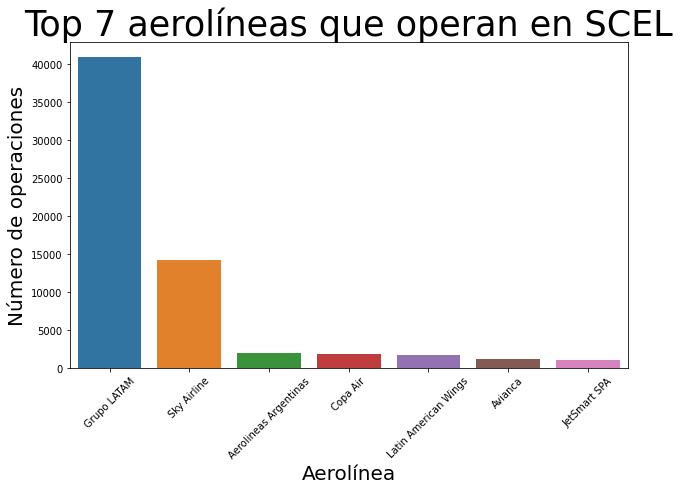

In [154]:
aer_top=[]
aer_top_count=[]
for i in range (7):
    aer_top.append(dataset.OPERA.value_counts().index[i])
    aer_top_count.append(dataset.OPERA.value_counts()[i])
plt.figure(figsize = (10,6))
ax = sns.barplot(aer_top, aer_top_count)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.title('Top 7 aerolíneas que operan en SCEL', fontsize=35)
ax.set_xlabel('Aerolínea', fontsize=20)
ax.set_ylabel('Número de operaciones', fontsize=20)
plt.show()

In [155]:
dataset.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [156]:
data=dataset.copy()

trabajaremos con el DF data para crear las columnas que se nos piden

- temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
- dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
- atraso_15 : 1 si dif_min > 15, 0 si no.
- periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .

In [157]:
from datetime import date
from datetime import datetime

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68206 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

In [ ]:
#definir condiciones 
condiciones = [df [' A_points ']> df [' B_points '],
              df [' A_points '] <df [' B_points ']]

#definir opciones
 opciones = [' A ', ' B ']

# crear una nueva columna en DataFrame que muestre los resultados de las comparaciones
 df [' ganador '] = np. seleccionar (condiciones, opciones, predeterminado = ' Empate ')

In [ ]:
condiciones = [data.DIA >= 15 & data.MES]

In [160]:
data['Fecha-I'][0]

Timestamp('2017-01-01 23:30:00')

In [159]:
type(data['Fecha-I'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [161]:
datetime.now()

datetime.datetime(2022, 8, 10, 21, 34, 47, 47220)

In [164]:
dt = datetime(2012, 5, 1)
ts = pd.DatetimeIndex([dt])[0]

In [165]:
ts

Timestamp('2012-05-01 00:00:00')

In [166]:
data['Fecha-I'][0] > ts

True

In [178]:
data['Fecha-I'].dt.year

0        2017
1        2017
2        2017
3        2017
4        2017
         ... 
68201    2017
68202    2017
68203    2017
68204    2017
68205    2017
Name: Fecha-I, Length: 68206, dtype: int64

In [179]:
data['Fecha-I'].dt.day

0         1
1         2
2         3
3         4
4         5
         ..
68201    22
68202    25
68203    27
68204    29
68205    31
Name: Fecha-I, Length: 68206, dtype: int64

In [180]:
data['Fecha-I'].dt.month

0         1
1         1
2         1
3         1
4         1
         ..
68201    12
68202    12
68203    12
68204    12
68205    12
Name: Fecha-I, Length: 68206, dtype: int64

Fecha-I está entre 15-Dic y 3-Mar

In [181]:
data[(data['Fecha-I'].dt.day >= 15) & (data['Fecha-I'].dt.month >=12)]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
61849,2017-12-16 23:55:00,226,SCEL,KMIA,AAL,2017-12-16 23:53:00,226,SCEL,KMIA,AAL,16,12,2017,Sabado,I,American Airlines,Santiago,Miami
61850,2017-12-17 23:55:00,226,SCEL,KMIA,AAL,2017-12-17 23:51:00,226,SCEL,KMIA,AAL,17,12,2017,Domingo,I,American Airlines,Santiago,Miami
61851,2017-12-18 23:55:00,226,SCEL,KMIA,AAL,2017-12-18 23:58:00,226,SCEL,KMIA,AAL,18,12,2017,Lunes,I,American Airlines,Santiago,Miami
61852,2017-12-20 23:55:00,226,SCEL,KMIA,AAL,2017-12-21 00:46:00,226,SCEL,KMIA,AAL,21,12,2017,Jueves,I,American Airlines,Santiago,Miami
61853,2017-12-21 23:55:00,226,SCEL,KMIA,AAL,2017-12-21 23:55:00,226,SCEL,KMIA,AAL,21,12,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


In [182]:
data[(data['Fecha-I'].dt.day >= 1) & (data['Fecha-I'].dt.month < 3)]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11664,2017-02-10 21:00:00,1300,SCEL,SCCF,JMR,2017-02-10 21:11:00,1300,SCEL,SCCF,JMR,10,2,2017,Viernes,N,Latin American Wings,Santiago,Calama
11665,2017-02-15 21:00:00,1300,SCEL,SCCF,JMR,2017-02-15 21:10:00,1300,SCEL,SCCF,JMR,15,2,2017,Miercoles,N,Latin American Wings,Santiago,Calama
11666,2017-02-20 16:00:00,1300,SCEL,SCCF,JMR,2017-02-20 16:06:00,1300,SCEL,SCCF,JMR,20,2,2017,Lunes,N,Latin American Wings,Santiago,Calama
11667,2017-02-24 16:00:00,1300,SCEL,SCCF,JMR,2017-02-24 16:03:00,1300,SCEL,SCCF,JMR,24,2,2017,Viernes,N,Latin American Wings,Santiago,Calama


In [183]:
data[(data['Fecha-I'].dt.day <= 3) & (data['Fecha-I'].dt.month == 3)]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
11669,2017-03-01 23:30:00,226,SCEL,KMIA,AAL,2017-03-01 23:19:00,226,SCEL,KMIA,AAL,1,3,2017,Miercoles,I,American Airlines,Santiago,Miami
11679,2017-03-01 22:00:00,912,SCEL,KMIA,AAL,2017-03-01 21:50:00,912,SCEL,KMIA,AAL,1,3,2017,Miercoles,I,American Airlines,Santiago,Miami
11680,2017-03-02 22:00:00,912,SCEL,KMIA,AAL,2017-03-02 21:51:00,912,SCEL,KMIA,AAL,2,3,2017,Jueves,I,American Airlines,Santiago,Miami
11681,2017-03-03 22:00:00,912,SCEL,KMIA,AAL,2017-03-03 21:53:00,912,SCEL,KMIA,AAL,3,3,2017,Viernes,I,American Airlines,Santiago,Miami
11710,2017-03-01 22:30:00,940,SCEL,KDFW,AAL,2017-03-01 22:29:00,940,SCEL,KDFW,AAL,1,3,2017,Miercoles,I,American Airlines,Santiago,Dallas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17063,2017-03-02 11:00:00,200,SCEL,SPJC,LAW,2017-03-02 11:09:00,200,SCEL,SPJC,JMR,2,3,2017,Jueves,I,Latin American Wings,Santiago,Lima
17064,2017-03-03 11:00:00,200,SCEL,SPJC,LAW,2017-03-03 11:11:00,200,SCEL,SPJC,JMR,3,3,2017,Viernes,I,Latin American Wings,Santiago,Lima
17095,2017-03-03 01:15:00,702,SCEL,SPJC,LAW,2017-03-03 01:15:00,700,SCEL,SPJC,JMR,3,3,2017,Viernes,I,Latin American Wings,Santiago,Lima
17099,2017-03-01 01:15:00,704,SCEL,SPJC,LAW,2017-03-01 03:53:00,704,SCEL,SPJC,JMR,1,3,2017,Miercoles,I,Latin American Wings,Santiago,Lima


15-Jul y 31-Jul

In [184]:
data[(data['Fecha-I'].dt.day >= 15) & (data['Fecha-I'].dt.month == 7)]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
32405,2017-07-15 20:00:00,912,SCEL,KMIA,AAL,2017-07-15 21:59:00,912,SCEL,KMIA,AAL,15,7,2017,Sabado,I,American Airlines,Santiago,Miami
32406,2017-07-17 20:00:00,912,SCEL,KMIA,AAL,2017-07-17 20:00:00,912,SCEL,KMIA,AAL,17,7,2017,Lunes,I,American Airlines,Santiago,Miami
32407,2017-07-18 20:00:00,912,SCEL,KMIA,AAL,2017-07-18 20:03:00,912,SCEL,KMIA,AAL,18,7,2017,Martes,I,American Airlines,Santiago,Miami
32408,2017-07-19 20:00:00,912,SCEL,KMIA,AAL,2017-07-19 19:51:00,912,SCEL,KMIA,AAL,19,7,2017,Miercoles,I,American Airlines,Santiago,Miami
32409,2017-07-20 20:00:00,912,SCEL,KMIA,AAL,2017-07-20 19:56:00,912,SCEL,KMIA,AAL,20,7,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38377,2017-07-27 18:47:00,8,SCEL,SCCF,JAT,2017-07-27 18:57:00,8,SCEL,SCCF,JAT,27,7,2017,Jueves,N,JetSmart SPA,Santiago,Calama
38378,2017-07-28 18:47:00,8,SCEL,SCCF,JAT,2017-07-28 18:50:00,8,SCEL,SCCF,JAT,28,7,2017,Viernes,N,JetSmart SPA,Santiago,Calama
38379,2017-07-30 18:47:00,8,SCEL,SCCF,JAT,2017-07-30 18:55:00,8,SCEL,SCCF,JAT,30,7,2017,Domingo,N,JetSmart SPA,Santiago,Calama
38380,2017-07-31 10:06:00,26,SCEL,SCFA,JAT,2017-07-31 10:47:00,26,SCEL,SCFA,JAT,31,7,2017,Lunes,N,JetSmart SPA,Santiago,Antofagasta


11-Sep y 30-Sep

In [185]:
data[(data['Fecha-I'].dt.day >= 11) & (data['Fecha-I'].dt.month == 9) & (data['Fecha-I'].dt.day <= 30)]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
44132,2017-09-16 21:00:00,912,SCEL,KMIA,AAL,2017-09-16 21:02:00,912,SCEL,KMIA,AAL,16,9,2017,Sabado,I,American Airlines,Santiago,Miami
44133,2017-09-17 21:00:00,912,SCEL,KMIA,AAL,2017-09-17 21:02:00,912,SCEL,KMIA,AAL,17,9,2017,Domingo,I,American Airlines,Santiago,Miami
44134,2017-09-18 21:00:00,912,SCEL,KMIA,AAL,2017-09-18 20:55:00,912,SCEL,KMIA,AAL,18,9,2017,Lunes,I,American Airlines,Santiago,Miami
44135,2017-09-19 21:00:00,912,SCEL,KMIA,AAL,2017-09-19 21:01:00,912,SCEL,KMIA,AAL,19,9,2017,Martes,I,American Airlines,Santiago,Miami
44136,2017-09-20 21:00:00,912,SCEL,KMIA,AAL,2017-09-20 20:58:00,912,SCEL,KMIA,AAL,20,9,2017,Miercoles,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49731,2017-09-29 17:37:00,253,SCEL,SCTE,JAT,2017-09-29 18:02:00,253,SCEL,SCTE,JAT,29,9,2017,Viernes,N,JetSmart SPA,Santiago,Puerto Montt
49732,2017-09-25 13:21:00,281,SCEL,SCQP,JAT,2017-09-25 13:18:00,281,SCEL,SCQP,JAT,25,9,2017,Lunes,N,JetSmart SPA,Santiago,Temuco
49733,2017-09-26 13:21:00,281,SCEL,SCQP,JAT,2017-09-26 13:12:00,281,SCEL,SCQP,JAT,26,9,2017,Martes,N,JetSmart SPA,Santiago,Temuco
49734,2017-09-27 13:00:00,281,SCEL,SCQP,JAT,2017-09-27 13:02:00,281,SCEL,SCQP,JAT,27,9,2017,Miercoles,N,JetSmart SPA,Santiago,Temuco


In [193]:
data[data['Fecha-I'].dt.day.between(11, 30, inclusive = True) & (data['Fecha-I'].dt.month == 9)]

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_23096\4261898480.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data[data['Fecha-I'].dt.day.between(11, 30, inclusive = True) & (data['Fecha-I'].dt.month == 9)]


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
44132,2017-09-16 21:00:00,912,SCEL,KMIA,AAL,2017-09-16 21:02:00,912,SCEL,KMIA,AAL,16,9,2017,Sabado,I,American Airlines,Santiago,Miami
44133,2017-09-17 21:00:00,912,SCEL,KMIA,AAL,2017-09-17 21:02:00,912,SCEL,KMIA,AAL,17,9,2017,Domingo,I,American Airlines,Santiago,Miami
44134,2017-09-18 21:00:00,912,SCEL,KMIA,AAL,2017-09-18 20:55:00,912,SCEL,KMIA,AAL,18,9,2017,Lunes,I,American Airlines,Santiago,Miami
44135,2017-09-19 21:00:00,912,SCEL,KMIA,AAL,2017-09-19 21:01:00,912,SCEL,KMIA,AAL,19,9,2017,Martes,I,American Airlines,Santiago,Miami
44136,2017-09-20 21:00:00,912,SCEL,KMIA,AAL,2017-09-20 20:58:00,912,SCEL,KMIA,AAL,20,9,2017,Miercoles,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49731,2017-09-29 17:37:00,253,SCEL,SCTE,JAT,2017-09-29 18:02:00,253,SCEL,SCTE,JAT,29,9,2017,Viernes,N,JetSmart SPA,Santiago,Puerto Montt
49732,2017-09-25 13:21:00,281,SCEL,SCQP,JAT,2017-09-25 13:18:00,281,SCEL,SCQP,JAT,25,9,2017,Lunes,N,JetSmart SPA,Santiago,Temuco
49733,2017-09-26 13:21:00,281,SCEL,SCQP,JAT,2017-09-26 13:12:00,281,SCEL,SCQP,JAT,26,9,2017,Martes,N,JetSmart SPA,Santiago,Temuco
49734,2017-09-27 13:00:00,281,SCEL,SCQP,JAT,2017-09-27 13:02:00,281,SCEL,SCQP,JAT,27,9,2017,Miercoles,N,JetSmart SPA,Santiago,Temuco


In [198]:
nuev=data['Fecha-I'].dt.day.between(11, 30, inclusive = True) & (data['Fecha-I'].dt.month == 9)

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_23096\3235693393.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  nuev=data['Fecha-I'].dt.day.between(11, 30, inclusive = True) & (data['Fecha-I'].dt.month == 9)


In [211]:
np.multiply(data['Fecha-I'].dt.day.between(11, 30, inclusive = True) & (data['Fecha-I'].dt.month == 9), 1)


C:\Users\Gerardo\AppData\Local\Temp\ipykernel_23096\1856389552.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  np.multiply(data['Fecha-I'].dt.day.between(11, 30, inclusive = True) & (data['Fecha-I'].dt.month == 9), 1)


0        0
1        0
2        0
3        0
4        0
        ..
68201    0
68202    0
68203    0
68204    0
68205    0
Name: Fecha-I, Length: 68206, dtype: int32

In [209]:
np.multiply((data['Fecha-I'].dt.day >= 15) & (data['Fecha-I'].dt.month == 7), 1)

0        0
1        0
2        0
3        0
4        0
        ..
68201    0
68202    0
68203    0
68204    0
68205    0
Name: Fecha-I, Length: 68206, dtype: int32

In [214]:
(np.multiply(data['Fecha-I'].dt.day.between(11, 30, inclusive = True) & (data['Fecha-I'].dt.month == 9), 1)) + (np.multiply((data['Fecha-I'].dt.day >= 15) & (data['Fecha-I'].dt.month == 7), 1)) + (np.multiply((data['Fecha-I'].dt.day <= 3) & (data['Fecha-I'].dt.month == 3), 1)) + (np.multiply((data['Fecha-I'].dt.day >= 1) & (data['Fecha-I'].dt.month < 3), 1)) + (np.multiply((data['Fecha-I'].dt.day >= 15) & (data['Fecha-I'].dt.month >=12), 1))

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_23096\209025246.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  (np.multiply(data['Fecha-I'].dt.day.between(11, 30, inclusive = True) & (data['Fecha-I'].dt.month == 9), 1)) + (np.multiply((data['Fecha-I'].dt.day >= 15) & (data['Fecha-I'].dt.month == 7), 1)) + (np.multiply((data['Fecha-I'].dt.day <= 3) & (data['Fecha-I'].dt.month == 3), 1)) + (np.multiply((data['Fecha-I'].dt.day >= 1) & (data['Fecha-I'].dt.month < 3), 1)) + (np.multiply((data['Fecha-I'].dt.day >= 15) & (data['Fecha-I'].dt.month >=12), 1))


0        1
1        1
2        1
3        1
4        1
        ..
68201    1
68202    1
68203    1
68204    1
68205    1
Name: Fecha-I, Length: 68206, dtype: int32

## Temporada alta

In [215]:
data['temporada_alta']=(np.multiply(data['Fecha-I'].dt.day.between(11, 30, inclusive = True) & (data['Fecha-I'].dt.month == 9), 1)) + (np.multiply((data['Fecha-I'].dt.day >= 15) & (data['Fecha-I'].dt.month == 7), 1)) + (np.multiply((data['Fecha-I'].dt.day <= 3) & (data['Fecha-I'].dt.month == 3), 1)) + (np.multiply((data['Fecha-I'].dt.day >= 1) & (data['Fecha-I'].dt.month < 3), 1)) + (np.multiply((data['Fecha-I'].dt.day >= 15) & (data['Fecha-I'].dt.month >=12), 1))

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_23096\3431407383.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data['temporada_alta']=(np.multiply(data['Fecha-I'].dt.day.between(11, 30, inclusive = True) & (data['Fecha-I'].dt.month == 9), 1)) + (np.multiply((data['Fecha-I'].dt.day >= 15) & (data['Fecha-I'].dt.month == 7), 1)) + (np.multiply((data['Fecha-I'].dt.day <= 3) & (data['Fecha-I'].dt.month == 3), 1)) + (np.multiply((data['Fecha-I'].dt.day >= 1) & (data['Fecha-I'].dt.month < 3), 1)) + (np.multiply((data['Fecha-I'].dt.day >= 15) & (data['Fecha-I'].dt.month >=12), 1))


## verificado

In [217]:
data.temporada_alta.value_counts()

0    45444
1    22762
Name: temporada_alta, dtype: int64

In [218]:
data[data['Fecha-I'].dt.month == 4]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta
17149,2017-04-01 21:00:00,912,SCEL,KMIA,AAL,2017-04-01 21:00:00,912,SCEL,KMIA,AAL,1,4,2017,Sabado,I,American Airlines,Santiago,Miami,0
17150,2017-04-02 21:00:00,912,SCEL,KMIA,AAL,2017-04-02 20:59:00,912,SCEL,KMIA,AAL,2,4,2017,Domingo,I,American Airlines,Santiago,Miami,0
17151,2017-04-03 21:00:00,912,SCEL,KMIA,AAL,2017-04-03 21:00:00,912,SCEL,KMIA,AAL,3,4,2017,Lunes,I,American Airlines,Santiago,Miami,0
17152,2017-04-05 21:00:00,912,SCEL,KMIA,AAL,2017-04-05 20:56:00,912,SCEL,KMIA,AAL,5,4,2017,Miercoles,I,American Airlines,Santiago,Miami,0
17153,2017-04-06 21:00:00,912,SCEL,KMIA,AAL,2017-04-06 21:00:00,912,SCEL,KMIA,AAL,6,4,2017,Jueves,I,American Airlines,Santiago,Miami,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22165,2017-04-28 01:15:00,704,SCEL,SPJC,LAW,2017-04-28 01:23:00,704,SCEL,SPJC,JMR,28,4,2017,Viernes,I,Latin American Wings,Santiago,Lima,0
22166,2017-04-29 01:15:00,704,SCEL,SPJC,LAW,2017-04-29 02:50:00,704,SCEL,SPJC,JMR,29,4,2017,Sabado,I,Latin American Wings,Santiago,Lima,0
22167,2017-04-06 21:10:00,43,SCEL,SCIE,LAW,2017-04-06 21:24:00,43R,SCEL,SCIE,JMR,6,4,2017,Jueves,N,Latin American Wings,Santiago,Concepcion,0
22168,2017-04-20 06:00:00,1704,SCEL,SPJC,LAW,2017-04-20 06:15:00,1704,SCEL,SPJC,JMR,20,4,2017,Jueves,I,Latin American Wings,Santiago,Lima,0


In [221]:
round(90.111, 2)

90.11

In [222]:
round(90.111, 0)

90.0

In [226]:
int(round(90.511, 0))

91

In [230]:
(dataset['Fecha-O'][0]-dataset['Fecha-I'][0]).total_seconds()

180.0

In [232]:
(dataset['Fecha-O'][0]-dataset['Fecha-I'][0]).seconds

180

In [235]:
int(round(2.083333/0.694333, 0))

3

In [238]:
np.round((dataset['Fecha-O']-dataset['Fecha-I']).map(mpdates.date2num)/0.694333, 0)

0         3.0
1         9.0
2         9.0
3         3.0
4        -2.0
         ... 
68201    46.0
68202    16.0
68203    40.0
68204    13.0
68205     9.0
Length: 68206, dtype: float64

In [250]:
np.round((dataset['Fecha-O']-dataset['Fecha-I']).map(mpdates.date2num)/factor, 0).astype(int)

0         3
1         9
2         9
3         3
4        -2
         ..
68201    46
68202    16
68203    40
68204    13
68205     9
Length: 68206, dtype: int32

In [241]:
dataset.head(1)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami


In [246]:
(dataset['Fecha-O'][0]-dataset['Fecha-I'][0]).seconds/60

3.0

In [249]:
factor=(dataset['Fecha-O']-dataset['Fecha-I']).map(mpdates.date2num)[0]/((dataset['Fecha-O'][0]-dataset['Fecha-I'][0]).seconds/60)

In [251]:
data['dif_min'] = np.round((data['Fecha-O']-data['Fecha-I']).map(mpdates.date2num)/factor, 0).astype(int)

In [256]:
data.tail()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400,SCEL,SPJC,JAT,31,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima,1,9


In [255]:
data.dif_min >= 15

0        False
1        False
2        False
3        False
4        False
         ...  
68201     True
68202     True
68203     True
68204    False
68205    False
Name: dif_min, Length: 68206, dtype: bool

In [258]:
np.multiply((data.dif_min > 15), 1)

0        0
1        0
2        0
3        0
4        0
        ..
68201    1
68202    1
68203    1
68204    0
68205    0
Name: dif_min, Length: 68206, dtype: int32

In [259]:
data['atraso_15'] = np.multiply((data.dif_min > 15), 1)

In [261]:
data.tail()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400,SCEL,SPJC,JAT,...,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46,1
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400,SCEL,SPJC,JAT,...,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16,1
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400,SCEL,SPJC,JAT,...,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40,1
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400,SCEL,SPJC,JAT,...,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13,0
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400,SCEL,SPJC,JAT,...,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima,1,9,0


- periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .

In [266]:
data['Fecha-I'].dt.hour

0        23
1        23
2        23
3        23
4        23
         ..
68201    14
68202    14
68203    14
68204    14
68205    14
Name: Fecha-I, Length: 68206, dtype: int64

In [268]:
data[(data['Fecha-I'].dt.hour >= 5) & (data['Fecha-I'].dt.hour < 12)]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15
201,2017-01-01 10:35:00,1281,SCEL,SABE,ARG,2017-01-01 10:25:00,1281,SCEL,SABE,ARG,...,1,2017,Domingo,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,-10,0
202,2017-01-02 10:35:00,1281,SCEL,SABE,ARG,2017-01-02 10:37:00,1281,SCEL,SABE,ARG,...,1,2017,Lunes,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,2,0
203,2017-01-03 10:35:00,1281,SCEL,SABE,ARG,2017-01-03 10:33:00,1281,SCEL,SABE,ARG,...,1,2017,Martes,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,-2,0
204,2017-01-04 10:35:00,1281,SCEL,SABE,ARG,2017-01-04 11:06:00,1281,SCEL,SABE,ARG,...,1,2017,Miercoles,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,31,1
205,2017-01-05 10:35:00,1281,SCEL,SABE,ARG,2017-01-05 10:53:00,1281,SCEL,SABE,ARG,...,1,2017,Jueves,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68168,2017-12-15 08:55:00,281,SCEL,SCQP,JAT,2017-12-15 08:56:00,281,SCEL,SCQP,JAT,...,12,2017,Viernes,N,JetSmart SPA,Santiago,Temuco,1,1,0
68171,2017-12-20 11:57:00,281,SCEL,SCQP,JAT,2017-12-20 12:02:00,281,SCEL,SCQP,JAT,...,12,2017,Miercoles,N,JetSmart SPA,Santiago,Temuco,1,5,0
68173,2017-12-22 08:55:00,281,SCEL,SCQP,JAT,2017-12-22 09:01:00,281,SCEL,SCQP,JAT,...,12,2017,Viernes,N,JetSmart SPA,Santiago,Temuco,1,6,0
68177,2017-12-27 11:57:00,281,SCEL,SCQP,JAT,2017-12-27 11:58:00,281,SCEL,SCQP,JAT,...,12,2017,Miercoles,N,JetSmart SPA,Santiago,Temuco,1,1,0


In [269]:
data[(data['Fecha-I'].dt.hour >= 12) & (data['Fecha-I'].dt.hour < 19)]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15
79,2017-01-01 13:35:00,92,SCEL,SAEZ,ACA,2017-01-01 13:54:00,92,SCEL,SAEZ,ACA,...,1,2017,Domingo,I,Air Canada,Santiago,Buenos Aires,1,19,1
80,2017-01-02 13:35:00,92,SCEL,SAEZ,ACA,2017-01-02 14:35:00,92,SCEL,SAEZ,ACA,...,1,2017,Lunes,I,Air Canada,Santiago,Buenos Aires,1,60,1
81,2017-01-03 13:35:00,92,SCEL,SAEZ,ACA,2017-01-03 13:52:00,92,SCEL,SAEZ,ACA,...,1,2017,Martes,I,Air Canada,Santiago,Buenos Aires,1,17,1
82,2017-01-04 13:35:00,92,SCEL,SAEZ,ACA,2017-01-04 14:01:00,92,SCEL,SAEZ,ACA,...,1,2017,Miercoles,I,Air Canada,Santiago,Buenos Aires,1,26,1
83,2017-01-05 13:35:00,92,SCEL,SAEZ,ACA,2017-01-05 13:49:00,92,SCEL,SAEZ,ACA,...,1,2017,Jueves,I,Air Canada,Santiago,Buenos Aires,1,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400,SCEL,SPJC,JAT,...,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46,1
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400,SCEL,SPJC,JAT,...,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16,1
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400,SCEL,SPJC,JAT,...,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40,1
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400,SCEL,SPJC,JAT,...,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13,0


In [273]:
data[(data['Fecha-I'].dt.hour >= 19)]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68058,2017-12-11 20:34:00,110,SCEL,SCDA,JAT,2017-12-11 20:57:00,110,SCEL,SCDA,JAT,...,12,2017,Lunes,N,JetSmart SPA,Santiago,Iquique,0,23,1
68062,2017-12-20 23:40:00,110,SCEL,SCDA,JAT,2017-12-20 23:39:00,110,SCEL,SCDA,JAT,...,12,2017,Miercoles,N,JetSmart SPA,Santiago,Iquique,1,-1,0
68068,2017-12-27 23:40:00,110,SCEL,SCDA,JAT,2017-12-28 00:02:00,33,SCEL,SCDA,JAT,...,12,2017,Jueves,N,JetSmart SPA,Santiago,Iquique,1,22,1
68194,2017-12-18 20:11:00,305,SCEL,SCCI,JAT,2017-12-18 20:21:00,305,SCEL,SCCI,JAT,...,12,2017,Lunes,N,JetSmart SPA,Santiago,Punta Arenas,1,10,0


In [274]:
data[(data['Fecha-I'].dt.hour < 5)]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15
169,2017-01-01 00:15:00,11,SCEL,MMMX,AMX,2017-01-01 00:04:00,11,SCEL,MMMX,AMX,...,1,2017,Domingo,I,Aeromexico,Santiago,Ciudad de Mexico,1,-11,0
170,2017-01-02 00:15:00,11,SCEL,MMMX,AMX,2017-01-02 00:28:00,11,SCEL,MMMX,AMX,...,1,2017,Lunes,I,Aeromexico,Santiago,Ciudad de Mexico,1,13,0
171,2017-01-03 00:15:00,11,SCEL,MMMX,AMX,2017-01-03 00:13:00,11,SCEL,MMMX,AMX,...,1,2017,Martes,I,Aeromexico,Santiago,Ciudad de Mexico,1,-2,0
172,2017-01-04 00:15:00,11,SCEL,MMMX,AMX,2017-01-04 00:03:00,11,SCEL,MMMX,AMX,...,1,2017,Miercoles,I,Aeromexico,Santiago,Ciudad de Mexico,1,-12,0
173,2017-01-05 00:15:00,11,SCEL,MMMX,AMX,2017-01-05 00:22:00,11,SCEL,MMMX,AMX,...,1,2017,Jueves,I,Aeromexico,Santiago,Ciudad de Mexico,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68190,2017-12-26 04:05:00,301,SCEL,SCCI,JAT,2017-12-26 04:05:00,301,SCEL,SCCI,JAT,...,12,2017,Martes,N,JetSmart SPA,Santiago,Punta Arenas,1,0,0
68191,2017-12-28 04:05:00,301,SCEL,SCCI,JAT,2017-12-28 04:06:00,301,SCEL,SCCI,JAT,...,12,2017,Jueves,N,JetSmart SPA,Santiago,Punta Arenas,1,1,0
68192,2017-12-29 04:05:00,301,SCEL,SCCI,JAT,2017-12-29 04:00:00,301,SCEL,SCCI,JAT,...,12,2017,Viernes,N,JetSmart SPA,Santiago,Punta Arenas,1,-5,0
68195,2017-12-23 04:05:00,305,SCEL,SCCI,JAT,2017-12-23 04:01:00,305,SCEL,SCCI,JAT,...,12,2017,Sabado,N,JetSmart SPA,Santiago,Punta Arenas,1,-4,0


In [275]:
pd.concat([data[(data['Fecha-I'].dt.hour >= 19)], data[(data['Fecha-I'].dt.hour < 5)]])

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68190,2017-12-26 04:05:00,301,SCEL,SCCI,JAT,2017-12-26 04:05:00,301,SCEL,SCCI,JAT,...,12,2017,Martes,N,JetSmart SPA,Santiago,Punta Arenas,1,0,0
68191,2017-12-28 04:05:00,301,SCEL,SCCI,JAT,2017-12-28 04:06:00,301,SCEL,SCCI,JAT,...,12,2017,Jueves,N,JetSmart SPA,Santiago,Punta Arenas,1,1,0
68192,2017-12-29 04:05:00,301,SCEL,SCCI,JAT,2017-12-29 04:00:00,301,SCEL,SCCI,JAT,...,12,2017,Viernes,N,JetSmart SPA,Santiago,Punta Arenas,1,-5,0
68195,2017-12-23 04:05:00,305,SCEL,SCCI,JAT,2017-12-23 04:01:00,305,SCEL,SCCI,JAT,...,12,2017,Sabado,N,JetSmart SPA,Santiago,Punta Arenas,1,-4,0


In [ ]:
data[(data['Fecha-I'].dt.hour >= 5) & (data['Fecha-I'].dt.hour < 12)]

In [ ]:
data[(data['Fecha-I'].dt.hour >= 12) & (data['Fecha-I'].dt.hour < 19)]

In [ ]:
pd.concat([data[(data['Fecha-I'].dt.hour >= 19)], data[(data['Fecha-I'].dt.hour < 5)]])

In [276]:
condit = [(data['Fecha-I'].dt.hour >= 5) & (data['Fecha-I'].dt.hour < 12),
         (data['Fecha-I'].dt.hour >= 12) & (data['Fecha-I'].dt.hour < 19)]
choice = ['mañana', 'tarde']

In [277]:
data['periodo_dia'] = np.select(condit, choice, default='noche')

In [279]:
data.head(500)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2,0,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2017-01-19 05:51:00,112,SCEL,MPTO,CMP,2017-01-19 05:55:00,112,SCEL,MPTO,CMP,...,2017,Jueves,I,Copa Air,Santiago,Ciudad de Panama,1,4,0,mañana
496,2017-01-20 05:51:00,112,SCEL,MPTO,CMP,2017-01-20 05:47:00,112,SCEL,MPTO,CMP,...,2017,Viernes,I,Copa Air,Santiago,Ciudad de Panama,1,-4,0,mañana
497,2017-01-21 05:51:00,112,SCEL,MPTO,CMP,2017-01-21 05:43:00,112,SCEL,MPTO,CMP,...,2017,Sabado,I,Copa Air,Santiago,Ciudad de Panama,1,-8,0,mañana
498,2017-01-22 05:51:00,112,SCEL,MPTO,CMP,2017-01-22 05:46:00,112,SCEL,MPTO,CMP,...,2017,Domingo,I,Copa Air,Santiago,Ciudad de Panama,1,-5,0,mañana


In [280]:
sf=pd.DataFrame

In [282]:
sf=data[['temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia']]

In [283]:
sf

,temporada_alta,dif_min,atraso_15,periodo_dia
0,1,3,0,noche
1,1,9,0,noche
2,1,9,0,noche
3,1,3,0,noche
4,1,-2,0,noche
...,...,...,...,...
68201,1,46,1,tarde
68202,1,16,1,tarde
68203,1,40,1,tarde
68204,1,13,0,tarde


In [285]:
sf.to_csv('synthetic_features.csv', index=False)

# Atrasos

In [288]:
color_pal=['b','orange','g', 'r', 'purple', 'brown', 'pink', 'gray', 'gold',
                                                         'cyan', 'violet', 'yellow']

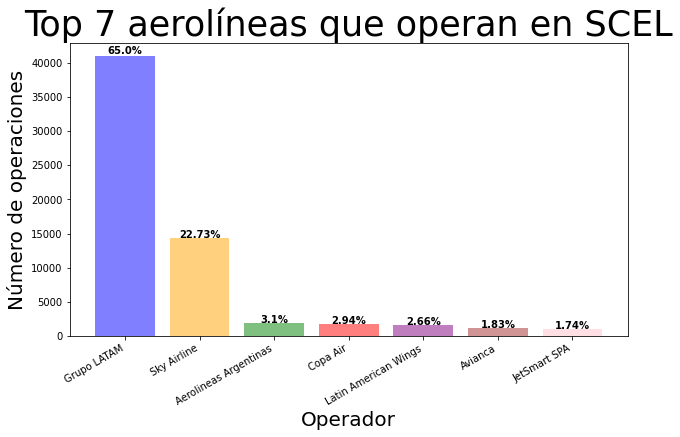

In [289]:
aer_top=[]
aer_top_count=[]
aer_tot=0
for i in range (7):
    aer_top.append(dataset.OPERA.value_counts().index[i])
    aer_top_count.append(dataset.OPERA.value_counts()[i])
    aer_tot+=dataset.OPERA.value_counts()[i]
fig = plt.figure(figsize = (10,6))
ax = plt.bar(aer_top, aer_top_count, alpha=0.5, color=color_pal)
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(aer_top_count[i]*100/aer_tot, 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
fig.autofmt_xdate()
plt.title('Top 7 aerolíneas que operan en SCEL', fontsize=35)
plt.xlabel('Operador', fontsize=20)
plt.ylabel('Número de operaciones', fontsize=20)
plt.show()

In [292]:
data.atraso_15.value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

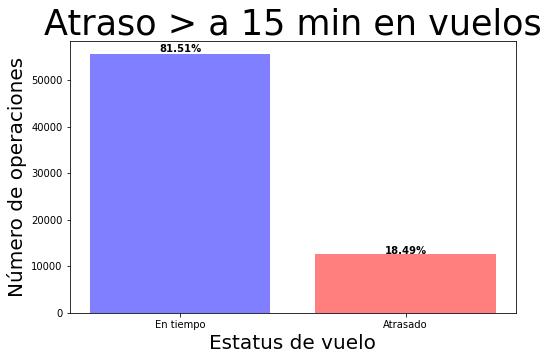

In [298]:
fig = plt.figure(figsize = (8,5))
ax = plt.bar(['En tiempo', 'Atrasado'], data.atraso_15.value_counts(), alpha=0.5, color=['b', 'r'])
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(data.atraso_15.value_counts()[i]*100/data.atraso_15.value_counts().sum(), 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
plt.title('Atraso > a 15 min en vuelos', fontsize=35)
plt.xlabel('Estatus de vuelo', fontsize=20)
plt.ylabel('Número de operaciones', fontsize=20)
plt.show()

In [291]:
atraso=data[data.atraso_15 > 0]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,...,2017,Sabado,I,American Airlines,Santiago,Miami,1,34,1,noche
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,40,1,noche
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,69,1,noche
23,2017-01-06 22:00:00,912,SCEL,KMIA,AAL,2017-01-06 22:52:00,912,SCEL,KMIA,AAL,...,2017,Viernes,I,American Airlines,Santiago,Miami,1,52,1,noche
26,2017-01-09 22:00:00,912,SCEL,KMIA,AAL,2017-01-09 22:26:00,912,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,26,1,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68198,2017-12-22 18:30:00,307,SCEL,SCCI,JAT,2017-12-22 18:47:00,307,SCEL,SCCI,JAT,...,2017,Viernes,N,JetSmart SPA,Santiago,Punta Arenas,1,17,1,tarde
68200,2017-12-20 14:55:00,400,SCEL,SPJC,JAT,2017-12-20 15:11:00,400,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,16,1,tarde
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16,1,tarde


In [306]:
atraso=data[data.atraso_15 > 0]

In [309]:
atraso.reset_index(drop=True, inplace=True)

In [310]:
atraso

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,...,2017,Sabado,I,American Airlines,Santiago,Miami,1,34,1,noche
1,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,40,1,noche
2,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,69,1,noche
3,2017-01-06 22:00:00,912,SCEL,KMIA,AAL,2017-01-06 22:52:00,912,SCEL,KMIA,AAL,...,2017,Viernes,I,American Airlines,Santiago,Miami,1,52,1,noche
4,2017-01-09 22:00:00,912,SCEL,KMIA,AAL,2017-01-09 22:26:00,912,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,26,1,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12609,2017-12-22 18:30:00,307,SCEL,SCCI,JAT,2017-12-22 18:47:00,307,SCEL,SCCI,JAT,...,2017,Viernes,N,JetSmart SPA,Santiago,Punta Arenas,1,17,1,tarde
12610,2017-12-20 14:55:00,400,SCEL,SPJC,JAT,2017-12-20 15:11:00,400,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,16,1,tarde
12611,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46,1,tarde
12612,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16,1,tarde


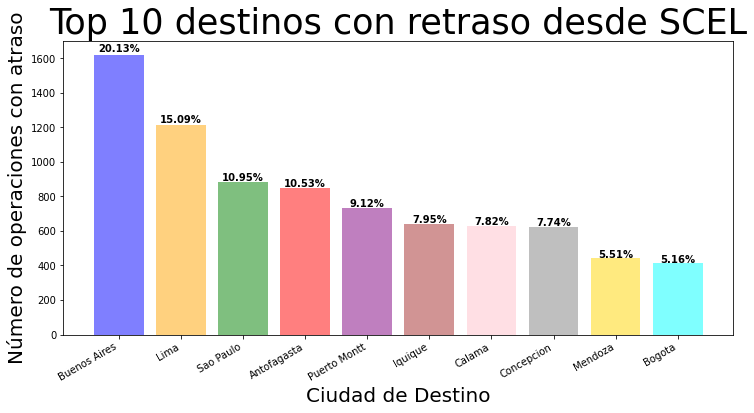

In [313]:
des_top_a=[]
des_top_count_a=[]
des_tot_a=0
for i in range (10):
    des_top_a.append(atraso.SIGLADES.value_counts().index[i])
    des_top_count_a.append(atraso.SIGLADES.value_counts()[i])
    des_tot_a+=atraso.SIGLADES.value_counts()[i]
fig = plt.figure(figsize = (12,6))
ax = plt.bar(des_top_a, des_top_count_a, alpha=0.5, color=color_pal)
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(des_top_count_a[i]*100/des_tot_a, 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
fig.autofmt_xdate()
plt.title('Top 10 destinos con retraso desde SCEL', fontsize=35)
plt.xlabel('Ciudad de Destino', fontsize=20)
plt.ylabel('Número de operaciones con atraso', fontsize=20)
plt.show()

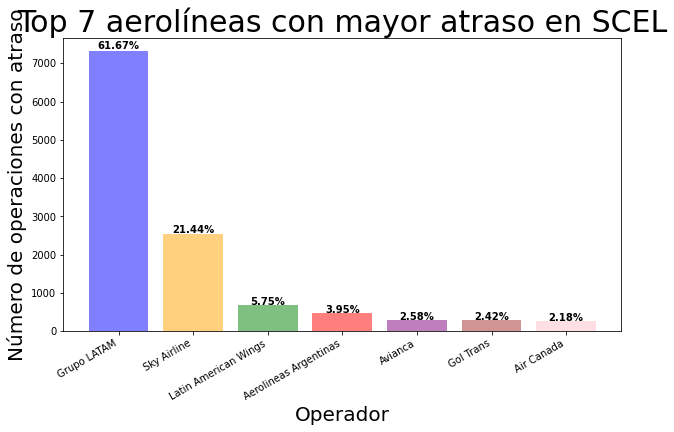

In [317]:
aer_top_a=[]
aer_top_count_a=[]
aer_tot_a=0
for i in range (7):
    aer_top_a.append(atraso.OPERA.value_counts().index[i])
    aer_top_count_a.append(atraso.OPERA.value_counts()[i])
    aer_tot_a+=atraso.OPERA.value_counts()[i]
fig = plt.figure(figsize = (10,6))
ax = plt.bar(aer_top_a, aer_top_count_a, alpha=0.5, color=color_pal)
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(aer_top_count_a[i]*100/aer_tot_a, 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
fig.autofmt_xdate()
plt.title('Top 7 aerolíneas con mayor atraso en SCEL', fontsize=30)
plt.xlabel('Operador', fontsize=20)
plt.ylabel('Número de operaciones con atraso', fontsize=20)
plt.show()

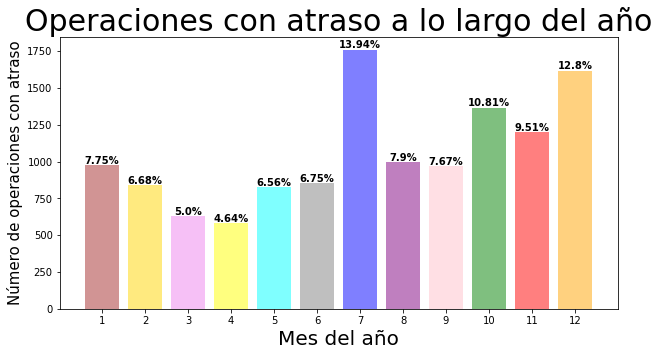

In [321]:
fig = plt.figure(figsize = (10,5))
ax = plt.bar(atraso.MES.value_counts().index, atraso.MES.value_counts(), alpha=0.5, color=color_pal)
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(atraso.MES.value_counts()[atraso.MES.value_counts().index[i]]*100/atraso.MES.value_counts().sum(), 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
plt.title('Operaciones con atraso a lo largo del año', fontsize=30)
plt.xlabel('Mes del año', fontsize=20)
plt.ylabel('Número de operaciones con atraso', fontsize=15)
plt.xticks(atraso.MES.value_counts().index)
plt.show()

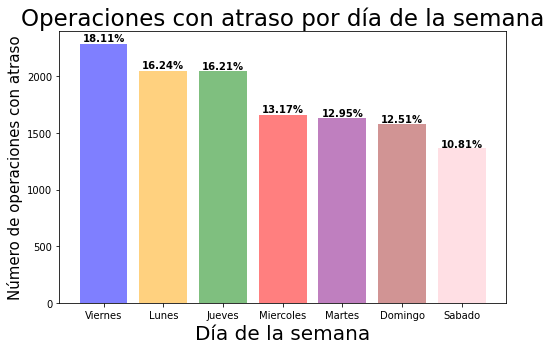

In [326]:
fig = plt.figure(figsize = (8,5))
ax = plt.bar(atraso.DIANOM.value_counts().index, atraso.DIANOM.value_counts(), alpha=0.5, color=color_pal)
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(atraso.DIANOM.value_counts()[i]*100/atraso.DIANOM.value_counts().sum(), 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
plt.title('Operaciones con atraso por día de la semana', fontsize=23)
plt.xlabel('Día de la semana', fontsize=20)
plt.ylabel('Número de operaciones con atraso', fontsize=15)
plt.show()

In [328]:
atraso.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,...,2017,Sabado,I,American Airlines,Santiago,Miami,1,34,1,noche
1,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,40,1,noche
2,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,69,1,noche
3,2017-01-06 22:00:00,912,SCEL,KMIA,AAL,2017-01-06 22:52:00,912,SCEL,KMIA,AAL,...,2017,Viernes,I,American Airlines,Santiago,Miami,1,52,1,noche
4,2017-01-09 22:00:00,912,SCEL,KMIA,AAL,2017-01-09 22:26:00,912,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,26,1,noche


In [329]:
atraso.temporada_alta.value_counts()

0    8144
1    4470
Name: temporada_alta, dtype: int64

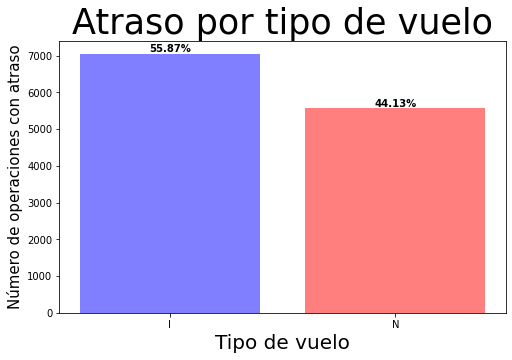

In [332]:
fig = plt.figure(figsize = (8,5))
ax = plt.bar(atraso.TIPOVUELO.value_counts().index, atraso.TIPOVUELO.value_counts(), alpha=0.5, color=['b', 'r'])
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(atraso.TIPOVUELO.value_counts()[i]*100/atraso.TIPOVUELO.value_counts().sum(), 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
plt.title('Atraso por tipo de vuelo', fontsize=35)
plt.xlabel('Tipo de vuelo', fontsize=20)
plt.ylabel('Número de operaciones con atraso', fontsize=15)
plt.show()

# importante, lo podríamos agregar

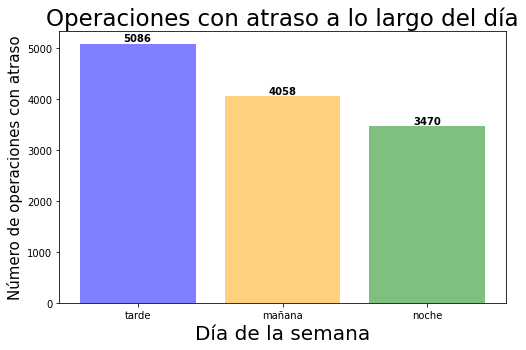

In [340]:
fig = plt.figure(figsize = (8,5))
ax = plt.bar(atraso.periodo_dia.value_counts().index, atraso.periodo_dia.value_counts(), alpha=0.5, color=color_pal)
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             #str(round(atraso.periodo_dia.value_counts()[i]*100/atraso.periodo_dia.value_counts().sum(), 2)) + '%',
             str(round(atraso.periodo_dia.value_counts()[i], 2)),
             ha='center',
             weight='bold')
    i+=1
plt.title('Operaciones con atraso a lo largo del día', fontsize=23)
plt.xlabel('Día de la semana', fontsize=20)
plt.ylabel('Número de operaciones con atraso', fontsize=15)
plt.show()

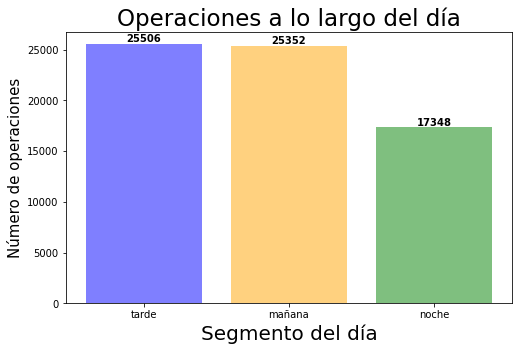

In [339]:
fig = plt.figure(figsize = (8,5))
ax = plt.bar(data.periodo_dia.value_counts().index, data.periodo_dia.value_counts(), alpha=0.5, color=color_pal)
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             #str(round(data.periodo_dia.value_counts()[i]*100/data.periodo_dia.value_counts().sum(), 2)) + '%',
             str(round(data.periodo_dia.value_counts()[i], 2)),
             ha='center',
             weight='bold')
    i+=1
plt.title('Operaciones a lo largo del día', fontsize=23)
plt.xlabel('Segmento del día', fontsize=20)
plt.ylabel('Número de operaciones', fontsize=15)
plt.show()

# entrenar modelos

In [343]:
dataset.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [342]:
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2,0,noche


In [344]:
data.to_csv('prueba.csv', index=False)

In [351]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [347]:
X = data.iloc[:, [11, 13, 14, 18, 21]].values
y = data.iloc[:, 20].values

In [348]:
LabelEncoder_X1=LabelEncoder()
X[:, 1] = LabelEncoder_X1.fit_transform(X[:, 1])
LabelEncoder_X2=LabelEncoder()
X[:, 2] = LabelEncoder_X2.fit_transform(X[:, 2])
LabelEncoder_X4=LabelEncoder()
X[:, 4] = LabelEncoder_X4.fit_transform(X[:, 4])

ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'), [1])],   
    remainder='passthrough')

X = np.array(ct.fit_transform(X), dtype=np.float)
#X = ct.fit_transform(X)
X = X[:, 1:]

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_23096\2074006586.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.array(ct.fit_transform(X), dtype=np.float)


In [349]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=0)

In [352]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [359]:
clasificador=Sequential()
clasificador.add(Dense(units=6, kernel_initializer='uniform',
                       activation='relu', input_dim=10))
clasificador.add(Dense(units=6, kernel_initializer='uniform',
                       activation='relu'))
clasificador.add(Dense(units=1, kernel_initializer='uniform',
                       activation='sigmoid'))
clasificador.compile(optimizer='adam', loss='binary_crossentropy',
                     metrics=['accuracy'])

In [360]:
clasificador.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
5457/5457 [==============================] - 14s 2ms/step - loss: 0.4734 - accuracy: 0.8150
Epoch 2/50
5457/5457 [==============================] - 13s 2ms/step - loss: 0.4662 - accuracy: 0.8151
Epoch 3/50
5457/5457 [==============================] - 10s 2ms/step - loss: 0.4654 - accuracy: 0.8151
Epoch 4/50
5457/5457 [==============================] - 10s 2ms/step - loss: 0.4651 - accuracy: 0.8151
Epoch 5/50
5457/5457 [==============================] - 10s 2ms/step - loss: 0.4646 - accuracy: 0.8151
Epoch 6/50
5457/5457 [==============================] - 10s 2ms/step - loss: 0.4647 - accuracy: 0.8151
Epoch 7/50
5457/5457 [==============================] - 12s 2ms/step - loss: 0.4646 - accuracy: 0.8151
Epoch 8/50
5457/5457 [==============================] - 11s 2ms/step - loss: 0.4644 - accuracy: 0.8151
Epoch 9/50
5457/5457 [==============================] - 13s 2ms/step - loss: 0.4643 - accuracy: 0.8151
Epoch 10/50
5457/5457 [==============================] - 13s 2ms/step - l

In [361]:
y_pred_aan= clasificador.predict(X_test)

427/427 [==============================] - 1s 1ms/step


In [362]:
y_pred25 = (y_pred>=0.25)

In [364]:
cm=confusion_matrix(y_test, y_pred25)
print(cm)

[[9282 1837]
 [1823  700]]


In [365]:
print(classification_report(y_test, y_pred25))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84     11119
           1       0.28      0.28      0.28      2523

    accuracy                           0.73     13642
   macro avg       0.56      0.56      0.56     13642
weighted avg       0.73      0.73      0.73     13642



### otro modelo

In [368]:
dim_entrada = X_train.shape[1]          # 29
capa_entrada = Input(shape=(dim_entrada,))

encoder = Dense(4, activation='tanh')(capa_entrada)
encoder = Dense(2, activation='relu')(encoder)

decoder = Dense(4, activation='tanh')(encoder)
decoder = Dense(10, activation='relu')(decoder)

autoencoder = Model(inputs=capa_entrada, outputs=decoder)

autoencoder.compile(optimizer='sgd', loss='mse')

autoencoder.fit(X_train, X_train, epochs=50, batch_size=10, shuffle=True, validation_data=(X_test,X_test), verbose=1)

X_pred = autoencoder.predict(X_test)
ecm = np.mean(np.power(X_test-X_pred,2), axis=1)

Epoch 1/50
5457/5457 [==============================] - 11s 2ms/step - loss: 0.8139 - val_loss: 0.6772
Epoch 2/50
5457/5457 [==============================] - 11s 2ms/step - loss: 0.6425 - val_loss: 0.6185
Epoch 3/50
5457/5457 [==============================] - 11s 2ms/step - loss: 0.5866 - val_loss: 0.5334
Epoch 4/50
5457/5457 [==============================] - 13s 2ms/step - loss: 0.4979 - val_loss: 0.4831
Epoch 5/50
5457/5457 [==============================] - 11s 2ms/step - loss: 0.4835 - val_loss: 0.4818
Epoch 6/50
5457/5457 [==============================] - 11s 2ms/step - loss: 0.4828 - val_loss: 0.4813
Epoch 7/50
5457/5457 [==============================] - 13s 2ms/step - loss: 0.4823 - val_loss: 0.4807
Epoch 8/50
5457/5457 [==============================] - 11s 2ms/step - loss: 0.4817 - val_loss: 0.4801
Epoch 9/50
5457/5457 [==============================] - 13s 2ms/step - loss: 0.4811 - val_loss: 0.4796
Epoch 10/50
5457/5457 [==============================] - 11s 2ms/step - l

In [369]:
y_pred2 = (ecm>=0.2)

In [370]:
cm=confusion_matrix(y_test, y_pred2)
print(cm)

[[   74 11045]
 [   15  2508]]


In [371]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.01      0.01     11119
           1       0.19      0.99      0.31      2523

    accuracy                           0.19     13642
   macro avg       0.51      0.50      0.16     13642
weighted avg       0.71      0.19      0.07     13642



combinando modelos

In [372]:
ecm2=ecm.reshape(13642,1)


In [373]:
y_tot_p = y_pred + ecm2

In [374]:
y_tot_p_44 = y_tot_p > 0.41

In [375]:
cm=confusion_matrix(y_test, y_tot_p_44)
print(cm)

[[  872 10247]
 [  111  2412]]


In [376]:
print(classification_report(y_test, y_tot_p_44))

              precision    recall  f1-score   support

           0       0.89      0.08      0.14     11119
           1       0.19      0.96      0.32      2523

    accuracy                           0.24     13642
   macro avg       0.54      0.52      0.23     13642
weighted avg       0.76      0.24      0.18     13642

